## Importing Libraries and Modules¶

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from PIL import Image
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

Using TensorFlow backend.


## Visualisation of Different Clothing Items in the Dataset

In [2]:
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

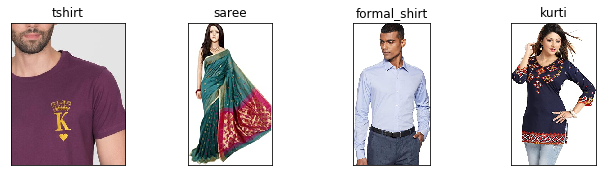

In [3]:
dir = 'dataset/'
folders = os.listdir(dir)
photos = [dir + '/' + folder for folder in folders]

all_images = []
for i in range(len(photos)):
    all_images.append(os.listdir(photos[i])[0])

images = []
for i in range(len(photos)):
    images.append(photos[i] + "/" + all_images[i])
    
images = np.array([cv2.imread(image)[...,::-1] for image in images])
names = [name for name in folders]
plot_portraits(images, names, 256, 256, n_row=1, n_col=4)

## Reading and Preparing Data

In [4]:
def prepare_data(path):
    X = []
    y = []
    j=0
    for folder in os.listdir(path):
        for file in os.listdir(path + folder):
            image = cv2.imread(os.path.join(path + folder, file))
            image = cv2.resize(image, (256,256), interpolation = cv2.INTER_AREA)
            X.append(image)
            y.append(j)
        j+=1
        
    X = np.array(X)
    X = X/255
    y = to_categorical(y, num_classes=4)
    
    return X, y

## Model Building

In [5]:
model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(20, kernel_size=3, activation='relu'))       
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))  #4 classes 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

## Model Testing

In [6]:
DATASET_PATH = "dataset/"
X, y = prepare_data(DATASET_PATH)

In [7]:
model.fit(X, y, epochs=2, validation_split=0.2)

Train on 2712 samples, validate on 678 samples
Epoch 1/2
2712/2712 [==============================] - 332s 122ms/sample - loss: 4.4484 - accuracy: 0.7518 - val_loss: 0.8103 - val_accuracy: 0.7478
Epoch 2/2
2712/2712 [==============================] - 288s 106ms/sample - loss: 0.1200 - accuracy: 0.9664 - val_loss: 0.7602 - val_accuracy: 0.7950


## Saving the Model

In [8]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Model Saved!")

Model Saved!
